# Create a Bar Graph Showcasing the Most Downloaded Media Files for a Given Specimen
Written by Annie Xu. Contact her at ax5@rice.edu with questions. Her email address will remain valid until roughly April 2024.

### The red-circled graph is our goal. Let's pull the top 5 or 6 most-downloaded media files for the specimen at hand.
Note that if your specimen has fewer than 5 or 6 associated media files, the code below should still be able to make a plot! Just don't use the method .head() when loading data into sns.barplot(). (sns.barplot() is one of the last functions called before producing the below graph.)

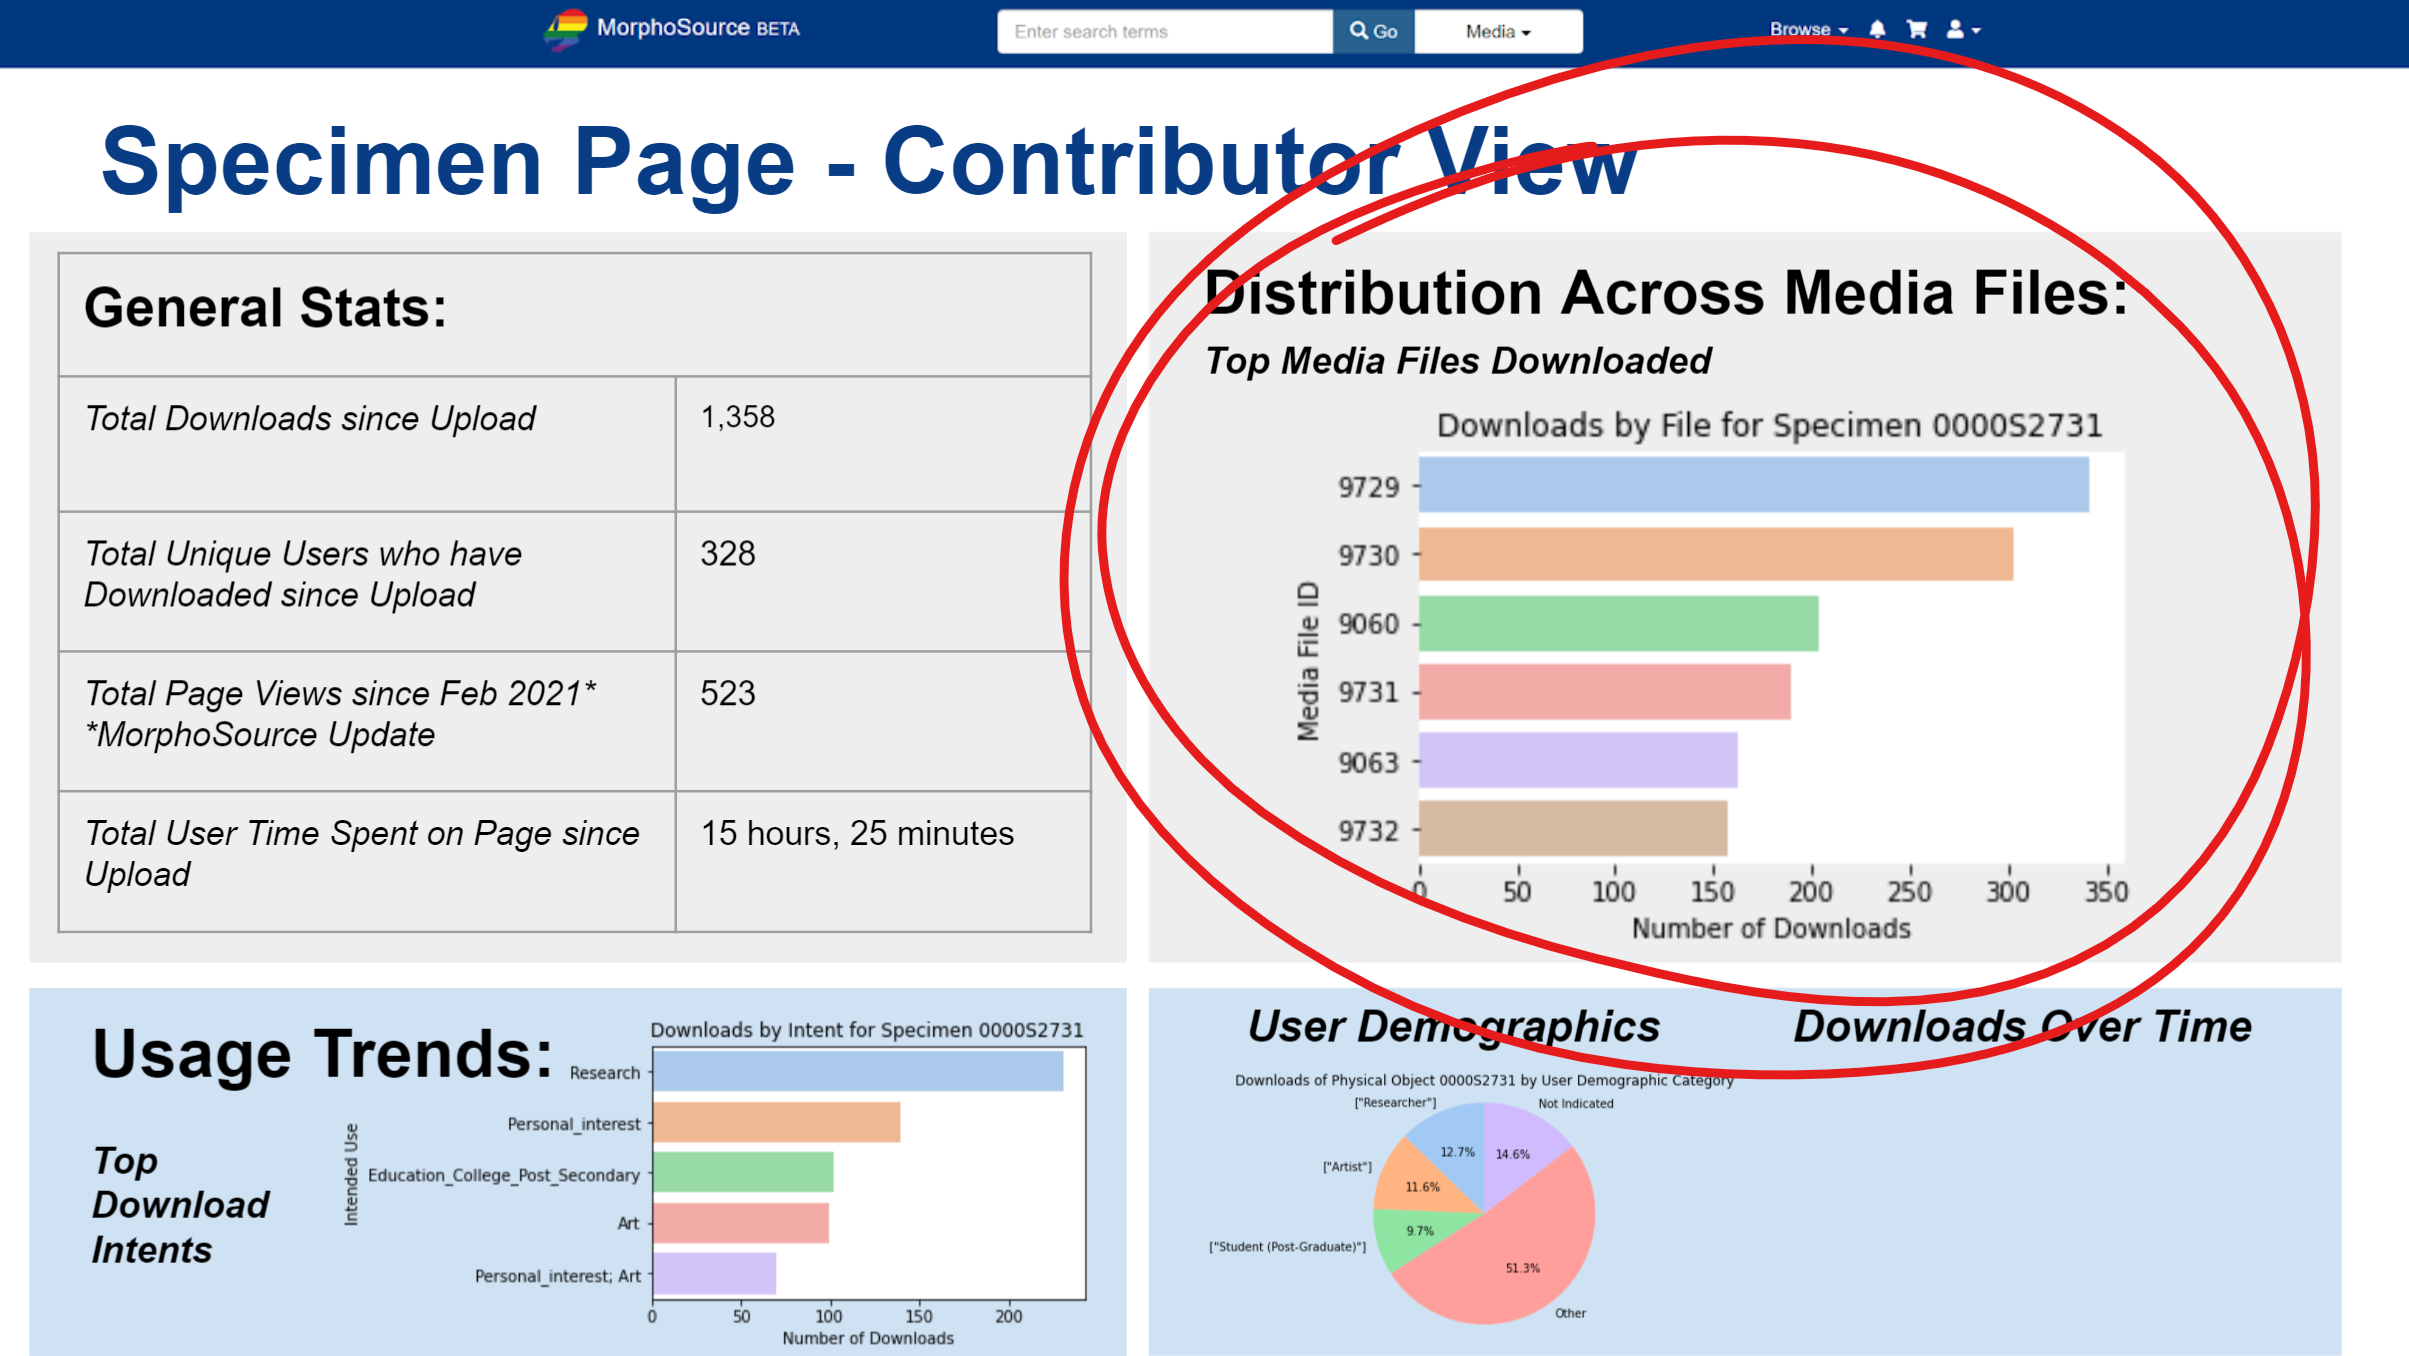

## Data needed:
- rows that each represent a single download of a given media file. 
     - Note that in my "merged_df", the unique media file ID is called 'work_id'. When I refer to a column and say 'work_id', I am speaking about the file ID! This variable may be called 'ms2_media_id' or 'media_id' in other guide/descriptive notebooks.
- a column that contains a user's 'ms_id'
- a column that contains a media file's 'physical_object_id', indicating which specimen that media corresponds to

## Preparatory steps -

First step: import relevant Python packages/libraries.

In [4]:
#libraries
import pandas as pd  # Python's pandas library does a great job with csv's and other forms of data.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

\
Next: set color tone to prepare for some aesthetic graphs.

In [5]:
#set color tone
sns.set_palette('pastel')

\
Now: load all relevant datasets.\
*Note:* A guide to creating the "merged_df" and "merged_df_copy" (it's the same file) should be forthcoming. This merged dataset is useful for finding specimen downloads because, unlike the original ms2_media_search csv, it contains 'physical_object_id' for each download recorded. Keep an eye out for it! 

In [6]:
#data
merged_df = pd.read_csv(r"C:\Users\annie\Desktop\data sci\data+\annie_merged_cart_items_ms2_media_search.csv", low_memory = False)

#other datasets that we may not need for this step, but do need for others.
#merged_df_copy = pd.read_csv(r"C:\Users\annie\Desktop\data sci\data+\annie_merged_cart_items_ms2_media_search.csv", low_memory = False)
# ms1_downloads = pd.read_csv(r"first_exploration_data\usage-data-main\ms1_downloads_intended_use.csv")
# cart_items = pd.read_csv(r"first_exploration_data\usage-data-main\cart_items.csv", low_memory=False)
# users = pd.read_csv(r'first_exploration_data\usage-data-main\users.csv', header = 1)
# ms2_media_search = pd.read_csv(r'first_exploration_data\ms2_media_search_with_facilities.csv')

\
Next: Let's make sure we're only including downloads that no longer have the item in-cart. We can modify "merged_df" a little by slicing for rows that have in-cart = False.

In [7]:
merged_df = merged_df[merged_df['in_cart'] == False] #store it back into the original variable name.

\
Finally...take a look to make sure our datasets (I call them dataframes) look like what we expect them to!

In [8]:
#prints the columns of our most important dataframe, "merged_df". I'm specifically looking to make sure that
#the rows 'work_id' and 'physical_object_id' are both there.
merged_df.columns

Index(['Unnamed: 0', 'id_x', 'work_id', 'created_at', 'updated_at',
       'date_downloaded', 'in_cart', 'date_requested', 'date_approved',
       'date_denied', 'date_canceled', 'date_expired', 'use', 'date_cleared',
       'user_id', 'action_by', 'reviewers', 'id_y', 'title', 'media_type',
       'modality', 'device_facility', 'physical_object_id',
       'physical_object_title', 'physical_object_organization',
       'physical_object_type', 'physical_object_taxonomy', 'short_description',
       'description', 'part', 'in_collections', 'ark', 'doi', 'date_uploaded',
       'date_modified', 'legacy_media_group_id', 'legacy_media_file_id'],
      dtype='object')

## Core steps - 

Let's slice for all the downloads for our example specimen (0000S2731).

In [9]:
cart_items_000S2731 = merged_df[merged_df['physical_object_id'] == '0000S2731'] #1358 rows, which indicates 1358 downloads. Nice!

### Now, we split up these downloads by media file.
In my "merged_df", media file ID is denoted by 'work_id'. Therefore, I'll place 'work_id' as the argument into the method .groupby(), which will then return a Pandas groupby object (I'm not entirely sure what a groupby object *is*, but in any case it groups things by the desired parameter(s) and supports various operations). Finally, applying the method .size() returns the number of elements in each group of the groupby object.

In [10]:
cart_by_file_specimen_000S2731 = cart_items_000S2731.groupby('work_id').size()
cart_by_file_specimen_000S2731

work_id
9060    204
9063    162
9729    342
9730    303
9731    189
9732    158
dtype: int64

### 'work_id' is currently an integer or float. To make bar graphs easier to create, I want to transform 'work_id' into a string. Let's move the index into its own column to prep for that transformation (though perhaps there are better ways to do it).

In [11]:
reset_cart_by_file_specimen_000S2731 = cart_by_file_specimen_000S2731.reset_index()
reset_cart_by_file_specimen_000S2731

,work_id,0
0,9060,204
1,9063,162
2,9729,342
3,9730,303
4,9731,189
5,9732,158


### Now, I set the 'work_id' column's datatype to a string.

In [17]:
reset_cart_by_file_specimen_000S2731 = reset_cart_by_file_specimen_000S2731.astype({'work_id':str})
reset_cart_by_file_specimen_000S2731.columns = ['work_id','downloads'] #rename columns
type(reset_cart_by_file_specimen_000S2731.work_id[0]) #looks like we now have a string!

str

### Finally, bar chart time. I'm going to use Seaborn's (abbreviated sns) bar chart function because it provides an easy way to craft a horizontal (as opposed to vertical) bar chart. Use whichever library you like best!

[Text(0, 0.5, 'Media File ID'),
 Text(0.5, 0, 'Number of Downloads'),
 Text(0.5, 1.0, 'Downloads by File for Specimen 0000S2731')]

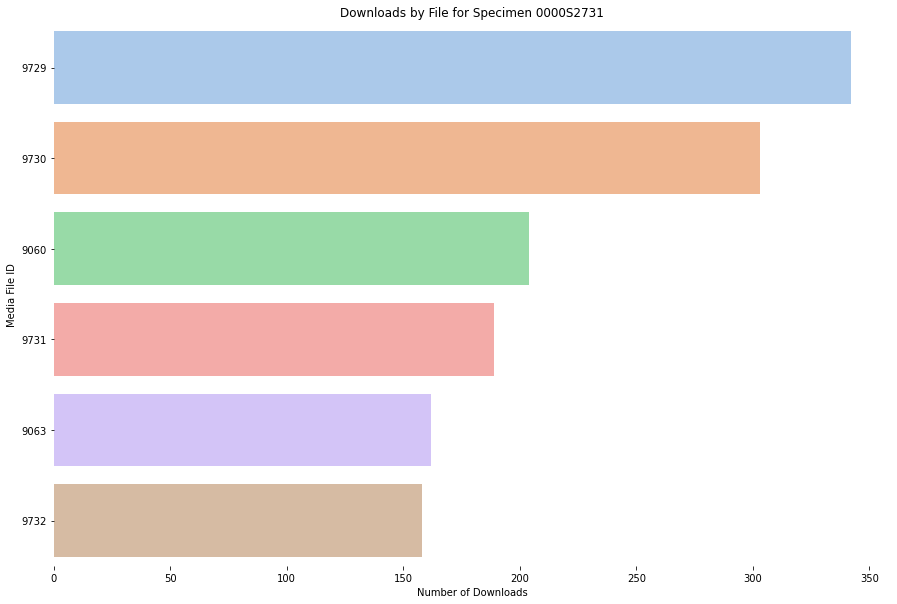

In [23]:
#initialize figure
f, ax = plt.subplots(figsize=(15,10))

#load in the data
#remove the method .head(6) for Specimen with fewer than 6 media files! Perhaps the .head() function you use may already
#account for a smaller-than-expected number of rows when .head() is called. 
sns.barplot(x = 'downloads', y = 'work_id', data = reset_cart_by_file_specimen_000S2731.sort_values(by = 'downloads', ascending= False).head(6))

#remove the lines on the sides of the graph for a cleaner look
sns.despine(left=True, bottom=True)

#name the axes
ax.set(ylabel="Media File ID", xlabel="Number of Downloads", title = 'Downloads by File for Specimen 0000S2731')

## All done! Good job.